In [117]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import Imputer
from fancyimpute import MICE

import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic

import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Load and check data
train_df = pd.read_csv('../../../datasets/titanic/train.csv');
test_df = pd.read_csv('../../../datasets/titanic/test.csv');

print train_df.info()
print '----------------------'
print test_df.info()

# Bind training and test data
full_df = pd.concat([train_df, test_df])

full_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare 

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [3]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [4]:
# Feature engineering!

# 1. Names
# 1.1. Grab title from passenger's name
full_df['Title'] = full_df['Name'].str.replace('(.*, )|(\\..*)', '')

# Show title counts by sex
pd.crosstab(full_df['Sex'], full_df['Title'], margins=True)

Title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess,All
Sex,,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1,466
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0,843
All,1,4,1,1,8,1,1,2,61,260,2,1,757,197,2,8,1,1,1309


In [5]:
# Reassign Mlle, Ms and Mme
full_df.loc[full_df['Title'].isin(['Mlle','Ms']), 'Title'] = 'Miss'
full_df.loc[full_df['Title'] == 'Mme', 'Title'] = 'Mrs'

# Combine rare titles to one group
rare_titles = ['Capt','Col','Don','Dona','Dr','Jonkheer','Lady','Major','Rev','Sir','the Countess']
full_df.loc[full_df['Title'].isin(rare_titles), 'Title'] = 'Rare title'

# Show updated title counts by sex
pd.crosstab(full_df['Sex'], full_df['Title'], margins=True)

Title,Master,Miss,Mr,Mrs,Rare title,All
Sex,,,,,,
female,0,264,0,198,4,466
male,61,0,757,0,25,843
All,61,264,757,198,29,1309


In [6]:
# 1.2. Grab surname from passenger's name
full_df['Surname'] = full_df['Name'].str.split(', ').str[0]

# Show the frequency of surnames
print 'Number of unique surnames: %d\n' % full_df['Surname'].nunique()
print full_df['Surname'].value_counts()

Number of unique surnames: 875

Sage          11
Andersson     11
Goodwin        8
Asplund        8
Davies         7
Johnson        6
Fortune        6
Smith          6
Panula         6
Brown          6
Ford           6
Skoog          6
Rice           6
Carter         6
Thomas         5
Ryerson        5
Lefebre        5
Palsson        5
Williams       5
Kelly          5
Dean           4
Baclini        4
Ware           4
Cacic          4
Herman         4
Hansen         4
Hocking        4
Allison        4
Johnston       4
Gustafsson     4
              ..
Butt           1
Parr           1
Riordan        1
Olsvigen       1
Dahlberg       1
Candee         1
Hogeboom       1
Colbert        1
Turja          1
Sdycoff        1
Lievens        1
Ivanoff        1
Myles          1
Ridsdale       1
Smart          1
Somerton       1
Hawksford      1
Hee            1
Tikkanen       1
Petterson      1
Guest          1
Vendel         1
Sagesser       1
Julian         1
Bengtsson      1
Harknett       1

In [7]:
# 2. Family features

# 2.1. Create a family size variable including the passenger himself
full_df['Family size'] = full_df['SibSp'] + full_df['Parch'] + 1

# 2.2. Create a family variable uniting surname and family size data
full_df['Family'] = full_df[['Surname','Family size']].apply(lambda x: '{}_{}'.format(x[0],x[1]), axis=1)

full_df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Surname,Family size,Family
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,Braund,2,Braund_2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,Cumings,2,Cumings_2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,Heikkinen,1,Heikkinen_1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,Futrelle,2,Futrelle_2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,Allen,1,Allen_1
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,Moran,1,Moran_1
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,McCarthy,1,McCarthy_1
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,Palsson,5,Palsson_5
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,Johnson,3,Johnson_3
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,Nasser,2,Nasser_2


[ 1  2  3  4  5  6  7  8 11]


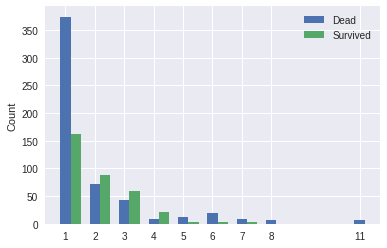

In [8]:
# 2.3. Plot number of survived and not survived depending on the family size (train part of dataframe)

# Barplot with matplotlib
fs_count_0 = full_df[full_df['Survived'] == 0]['Family size'].value_counts()
fs_count_1 = full_df[full_df['Survived'] == 1]['Family size'].value_counts()

fig, ax = plt.subplots()

width = 0.35       # the width of the bars
idx = np.unique(np.concatenate((fs_count_0.index, fs_count_1.index)))

print idx


bar_0 = ax.bar(fs_count_0.index, fs_count_0.values, width)
bar_1 = ax.bar(fs_count_1.index + width, fs_count_1.values, width)

# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_title('')
ax.set_xticks(idx)

ax.legend((bar_0[0], bar_1[0]), ('Dead', 'Survived'))

plt.show()

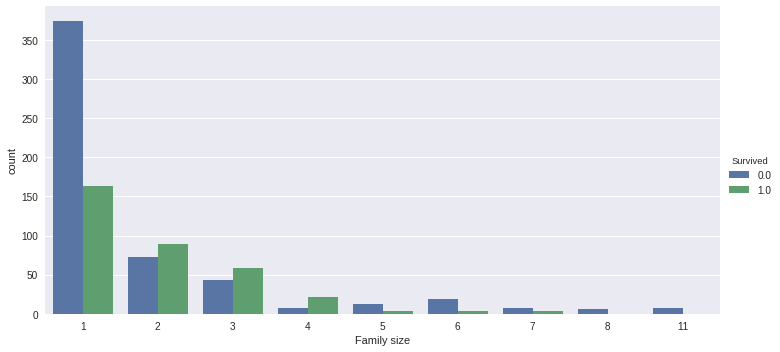

In [9]:
# Factorplot with seaborn
g = sns.factorplot('Family size', data=full_df[full_df.Survived.notnull()], 
                   hue='Survived', kind='count', size=5, aspect=2)

(<matplotlib.figure.Figure at 0x7f98dc4e6cd0>,
 OrderedDict([(('small', '0.0'), (0.0, 0.0, 0.3244768921336578, 0.41983343193919809)), (('small', '1.0'), (0.0, 0.42315569107541073, 0.3244768921336578, 0.57684430892458916)), (('single', '0.0'), (0.3294273871831628, 0.0, 0.5967263393005967, 0.6941479982924702)), (('single', '1.0'), (0.3294273871831628, 0.69747025742868274, 0.5967263393005967, 0.30252974257131715)), (('large', '0.0'), (0.9311042215332644, 0.0, 0.06889577846673557, 0.83592326653091842)), (('large', '1.0'), (0.9311042215332644, 0.83924552566713095, 0.06889577846673557, 0.16075447433286888))]))

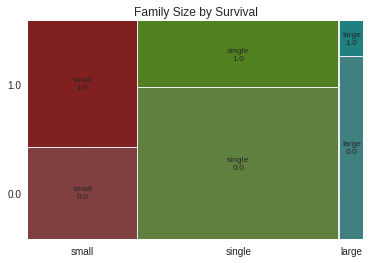

In [10]:
# The plot above shows that there can be three different groups of family size depending on the survival factor:
# 1. Single passengers who mostly did not survive
# 2. Passengers with small families who mostly survived
# 3. Passengers with large families who mostly did not survive

# 2.4. Discretize family size
full_df.loc[full_df['Family size'] == 1, 'Family size D'] = 'single'
full_df.loc[(full_df['Family size'] > 1) & (full_df['Family size'] < 5), 'Family size D'] = 'small'
full_df.loc[full_df['Family size'] > 4, 'Family size D'] = 'large'

# Mosaic plot
mosaic(full_df, ['Family size D', 'Survived'], title='Family Size by Survival')

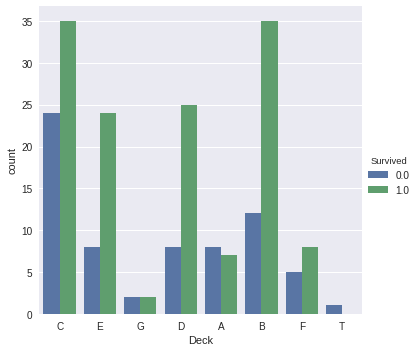

In [11]:
# 3. Cabins (is missing mostly)

# 3.1. Grab the deck from cabin (the first letter)
full_df.loc[full_df['Cabin'].notnull(),'Deck'] = full_df[full_df['Cabin'].notnull()]['Cabin'].str[0]

# Show a factorplot
g = sns.factorplot('Deck', data=full_df[full_df.Cabin.notnull()], hue='Survived', kind='count', size=5)

In [12]:
# Filling in the missing data!

full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 18 columns):
Age              1046 non-null float64
Cabin            295 non-null object
Embarked         1307 non-null object
Fare             1308 non-null float64
Name             1309 non-null object
Parch            1309 non-null int64
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Survived         891 non-null float64
Ticket           1309 non-null object
Title            1309 non-null object
Surname          1309 non-null object
Family size      1309 non-null int64
Family           1309 non-null object
Family size D    1309 non-null object
Deck             295 non-null object
dtypes: float64(3), int64(5), object(10)
memory usage: 194.3+ KB


In [13]:
# 1. Embarkment
full_df[full_df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Surname,Family size,Family,Family size D,Deck
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,Icard,1,Icard_1,single,B
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,Stone,1,Stone_1,single,B


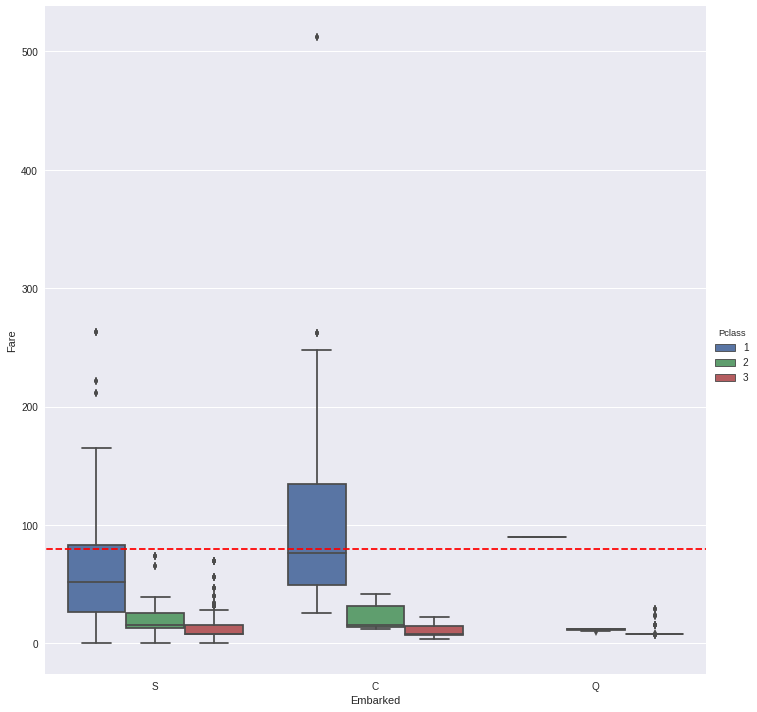

In [14]:
# Both passengers have fare 80 and class 1. 
# Let's see what is the distribution of fare depending on embarkment.

# Visualize embarkment, passenger class, & median fare
g = sns.factorplot('Embarked', 'Fare', data=full_df[full_df.Embarked.notnull()], kind='box', 
                   hue='Pclass', size=10)

plt.hlines(80, -1, 3, color='red', linestyles='dashed') # Plot 80$ fare as a horizontal line

In [15]:
# From the factorplot we can see that 80$ fare is the median value for the 1st class with embarkment of C.
# Now we can fill the missing data here.
full_df.loc[full_df.Embarked.isnull(),'Embarked'] = 'C'

In [16]:
# 2. Fare
full_df[full_df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Surname,Family size,Family,Family size D,Deck
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr,Storey,1,Storey_1,single,NaN


Median fare value: 8.05$


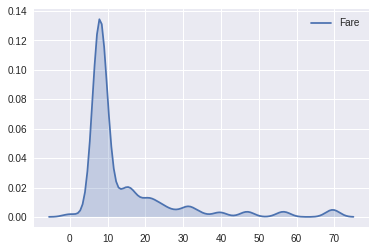

In [17]:
# This passenger embarked from S and has class 3. 
# Let's plot the density vs fair to see the median value.
s3_fare = full_df.loc[(full_df.Embarked == 'S') & (full_df.Pclass == 3) & full_df.Fare.notnull(),'Fare']

g = sns.kdeplot(s3_fare, shade=True)

print 'Median fare value: %.2f$' % s3_fare.median()

In [18]:
# It is sensible to fill the missing value with the median one
full_df.loc[full_df.Fare.isnull(),'Fare'] = 8.05

In [19]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 18 columns):
Age              1046 non-null float64
Cabin            295 non-null object
Embarked         1309 non-null object
Fare             1309 non-null float64
Name             1309 non-null object
Parch            1309 non-null int64
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Survived         891 non-null float64
Ticket           1309 non-null object
Title            1309 non-null object
Surname          1309 non-null object
Family size      1309 non-null int64
Family           1309 non-null object
Family size D    1309 non-null object
Deck             295 non-null object
dtypes: float64(3), int64(5), object(10)
memory usage: 194.3+ KB


In [20]:
# 3. Age

# As MICE expects a matrix of float values let's convert all object values (categorical) into float
mice_columns = [
    'Age','Embarked','Fare','Parch','Pclass','Sex','SibSp','Title','Family size','Family size D','Deck']

mice_input = full_df[mice_columns]

mice_input.loc[:,'Embarked'] = mice_input.loc[:,'Embarked'].map({'S': 1, 'C': 2, 'Q': 3})
mice_input.loc[:,'Sex'] = mice_input.loc[:,'Sex'].map({'male': 0, 'female': 1})
mice_input.loc[:,'Title'] = mice_input.loc[:,'Title']\
    .map({'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare title': 5})
    
mice_input.loc[:,'Family size D'] = mice_input.loc[:,'Family size D'].map({'single': 1, 'small': 2, 'large': 3})
mice_input.loc[:,'Deck'] = mice_input.loc[:,'Deck']\
    .map({'C': 1, 'B': 2, 'D': 3, 'E': 4, 'A': 5, 'F': 6, 'G': 7, 'T': 8})
    
mice = MICE()
filled = MICE.complete(mice, np.asarray(mice_input))
filled_df = pd.DataFrame(data=filled, columns=mice_columns)

/home/velika12/anaconda2/envs/main/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


[MICE] Completing matrix with shape (1309, 11)
[MICE] Starting imputation round 1/110, elapsed time 0.000
[MICE] Starting imputation round 2/110, elapsed time 0.003
[MICE] Starting imputation round 3/110, elapsed time 0.004
[MICE] Starting imputation round 4/110, elapsed time 0.006
[MICE] Starting imputation round 5/110, elapsed time 0.008
[MICE] Starting imputation round 6/110, elapsed time 0.009
[MICE] Starting imputation round 7/110, elapsed time 0.011
[MICE] Starting imputation round 8/110, elapsed time 0.012
[MICE] Starting imputation round 9/110, elapsed time 0.013
[MICE] Starting imputation round 10/110, elapsed time 0.014
[MICE] Starting imputation round 11/110, elapsed time 0.015
[MICE] Starting imputation round 12/110, elapsed time 0.016
[MICE] Starting imputation round 13/110, elapsed time 0.017
[MICE] Starting imputation round 14/110, elapsed time 0.017
[MICE] Starting imputation round 15/110, elapsed time 0.018
[MICE] Starting imputation round 16/110, elapsed time 0.019
[M

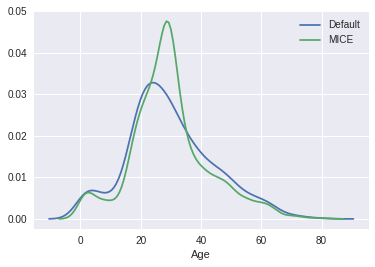

In [21]:
g_raw = sns.kdeplot(full_df['Age'], label='Default')
g_filled = sns.kdeplot(filled_df['Age'], label='MICE')
plt.xlabel('Age')

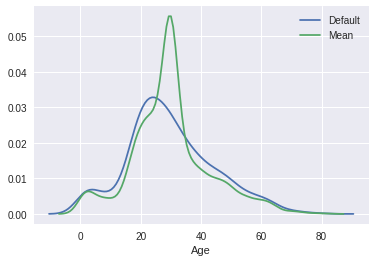

In [22]:
# Trying to use imputation from sklearn to complete missing values (with different strategies)
imp_mean = Imputer(strategy='mean')
filled_age_mean = imp_mean.fit_transform(full_df[['Age']])

filled_age_mean_df = pd.DataFrame(data=filled_age_mean, columns=['Age'])

g_raw = sns.kdeplot(full_df['Age'], label='Default')
g_filled = sns.kdeplot(filled_age_mean_df['Age'], label='Mean')
plt.xlabel('Age')

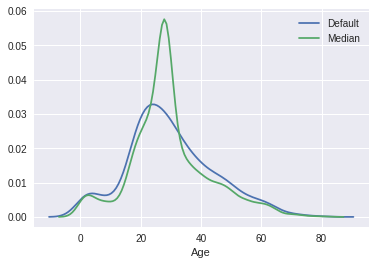

In [23]:
imp_median = Imputer(strategy='median')
filled_age_median = imp_median.fit_transform(full_df[['Age']])

filled_age_median_df = pd.DataFrame(data=filled_age_median, columns=['Age'])

g_raw = sns.kdeplot(full_df['Age'], label='Default')
g_filled = sns.kdeplot(filled_age_median_df['Age'], label='Median')
plt.xlabel('Age')

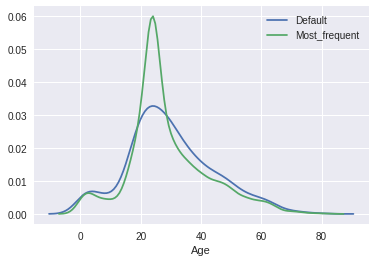

In [24]:
imp_most_frequent = Imputer(strategy='most_frequent')
filled_age_most_frequent = imp_most_frequent.fit_transform(full_df[['Age']])

filled_age_most_frequent_df = pd.DataFrame(data=filled_age_most_frequent, columns=['Age'])

g_raw    = sns.kdeplot(full_df['Age'], label='Default')
g_filled = sns.kdeplot(filled_age_most_frequent_df['Age'], label='Most_frequent')
plt.xlabel('Age')

263
0


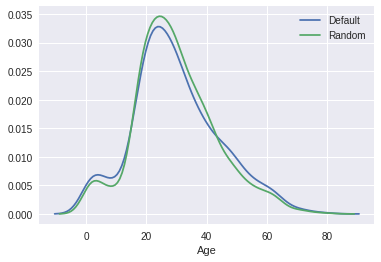

In [31]:
# Trying to impute random numbers into age column
average_age   = full_df['Age'].mean()
std_age       = full_df['Age'].std()
count_nan_age = full_df['Age'].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_age = np.random.randint(average_age - std_age, average_age + std_age, size=count_nan_age)

filled_rand_df = full_df.copy()
filled_rand_df.loc[filled_rand_df['Age'].isnull(),'Age'] = rand_age

print full_df.Age.isnull().sum()
print filled_rand_df.Age.isnull().sum()

g_raw    = sns.kdeplot(full_df['Age'], label='Default')
g_filled = sns.kdeplot(filled_rand_df['Age'], label='Random')
plt.xlabel('Age')

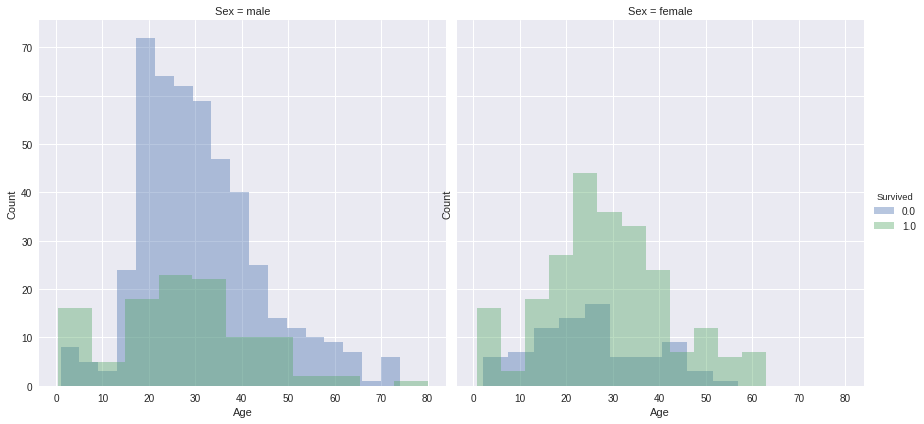

In [127]:
# Random numbers generation seems to provide the closest distribution to the default one 
# among all imputation results, so let's use it further
filled_df = filled_rand_df.copy()

# Let's plot relationship between age and survival
g = sns.FacetGrid(filled_rand_df[filled_rand_df.Survived.notnull()], col='Sex', hue='Survived', \
                  size=6, aspect=1)
g.map(sns.distplot, 'Age', kde=False).add_legend()
g.set(ylabel='Count')

#sns.factorplot('Age', 'Survived', data=filled_rand_df[filled_rand_df.Survived.notnull()], row='Sex', hue='Survived', \
#               kind='bar', size=5, aspect=3)

In [136]:
# Create connection mother --- child

# Filter children and adults
filled_df.loc[filled_df['Age'] < 18, 'Child'] = 1
filled_df.loc[filled_df['Age'] >= 18, 'Child'] = 0

pd.crosstab(filled_df['Child'], filled_df['Survived'])

Survived,0.0,1.0
Child,,
0.0,489,273
1.0,60,69


In [139]:
filled_df['Mother'] = 0
filled_df.loc[(filled_df['Sex'] == 'female') & \
              (filled_df['Child'] == 0)      & \
              (filled_df['Parch'] > 0)       & \
              (filled_df['Title'] != 'Miss'), 'Mother'] = 1

pd.crosstab(filled_df['Mother'], filled_df['Survived'])

Survived,0.0,1.0
Mother,,
0,534,302
1,15,40
